In [4]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=.2)
%matplotlib inline

In [6]:
recipes = pd.read_csv("Cupcakes vs Muffins.csv")
print(recipes.head())

     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


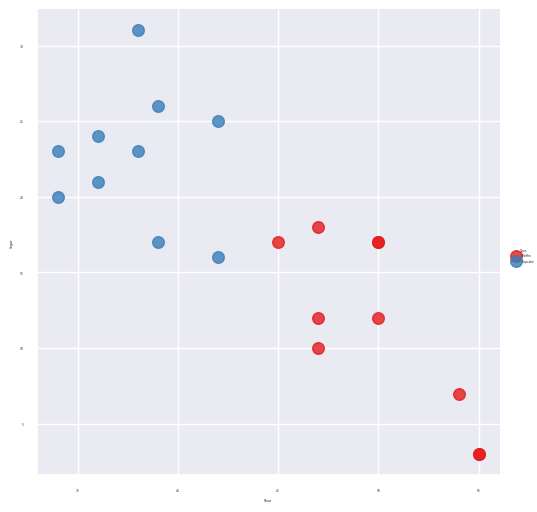

In [8]:
sns.lmplot(x='Flour', y='Sugar', data = recipes, hue='Type',
           palette = 'Set1', fit_reg=False, scatter_kws={"s":70});
plt.show()           

In [10]:
#format or preporocess ths data
type_label = np.where(recipes['Type']=='Muffin', 0,1)
recipe_features =recipes.columns.values[1:].tolist()
recipe_features
ingredients = recipes[['Flour', 'Sugar']].values
ingredients

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [14]:
#fit model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [16]:
#get separating hyperplane
w=model.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(30,60)
yy = a*xx - (model.intercept_[0])/ w[1]
print(yy)

#plot the parallels to the seperating hyperplane that pass through the support vector.
b= model.support_vectors_[0]
yy_down = a*xx+(b[1]-a*b[0])
b= model.support_vectors_[-1]
yy_up = a*xx+(b[1]-a*b[0])

[ 1.15779472e+16  1.10528750e+16  1.05278028e+16  1.00027306e+16
  9.47765844e+15  8.95258624e+15  8.42751405e+15  7.90244185e+15
  7.37736965e+15  6.85229746e+15  6.32722526e+15  5.80215306e+15
  5.27708087e+15  4.75200867e+15  4.22693647e+15  3.70186428e+15
  3.17679208e+15  2.65171988e+15  2.12664769e+15  1.60157549e+15
  1.07650329e+15  5.51431096e+14  2.63588995e+13 -4.98713297e+14
 -1.02378549e+15 -1.54885769e+15 -2.07392989e+15 -2.59900208e+15
 -3.12407428e+15 -3.64914648e+15 -4.17421867e+15 -4.69929087e+15
 -5.22436307e+15 -5.74943526e+15 -6.27450746e+15 -6.79957966e+15
 -7.32465185e+15 -7.84972405e+15 -8.37479625e+15 -8.89986844e+15
 -9.42494064e+15 -9.95001284e+15 -1.04750850e+16 -1.10001572e+16
 -1.15252294e+16 -1.20503016e+16 -1.25753738e+16 -1.31004460e+16
 -1.36255182e+16 -1.41505904e+16]


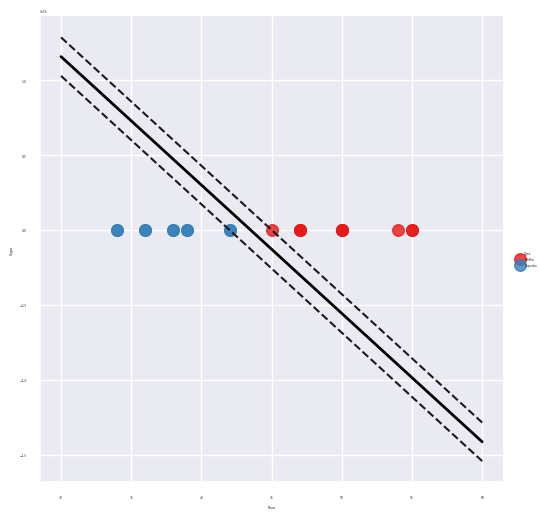

In [18]:
sns.lmplot(x='Flour', y='Sugar', data = recipes, hue='Type',
           palette = 'Set1', fit_reg=False, scatter_kws={"s":70});
plt.plot (xx,yy, linewidth =2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [23]:
#create a function to predict a muffin or a cupcake
def muffin_or_cupcake (flour, sugar):
    if (model.predict([[flour, sugar]]))==0:
        print('You\'re looking for a muffin recipe')
    else:
        print('You\re looking for a cupcake recipe')
        
muffin_or_cupcake(50,20)       

You're looking for a muffin recipe


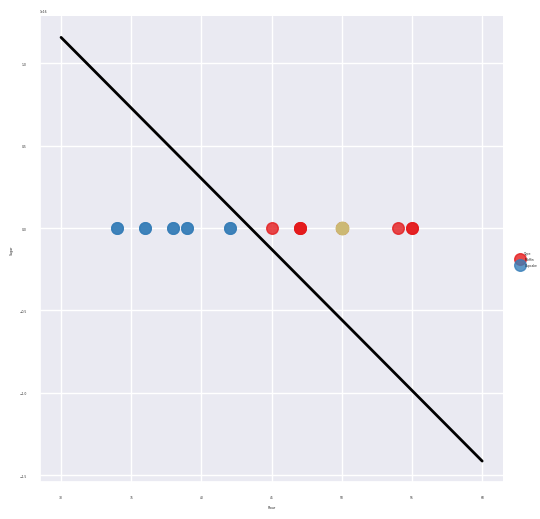

In [29]:
sns.lmplot(x='Flour', y='Sugar', data = recipes, hue='Type',
           palette = 'Set1', fit_reg=False, scatter_kws={"s":70});
plt.plot(xx,yy, linewidth=2, color='black')
plt.plot(50,20, 'yo', markersize = '9')